# Simulation exercises

This notebook contains some very basic simulation exercises to show how simulation helps us understand and visualise how the theories of probablity works practically. We will consider a few very basic probability problems that can be mathematically solved fairly easily, and we will use simulation techniques to solve them as well.

## Problem 1
### The birthday paradox

Though this problem is known as Birthday 'Paradox' it's not really so. It is a famous statistical example, which asks the question, if there are 'n' number of people in a room then what is the probability that at least two of them has the same birthday.

This problem, theoritically can be thought of as this - 
Assume we are only dealing with non-leap years, so that there are 365 days in total. So, the total possible combination of birthdays could be $365^n$. But going through this approach would require us to consider the principle of inclusion and exclusion and creating a huge equation to solve. Rather we could go by the complementary method. 

The same problem could be though of as to calculate the complement probability of the event that none of the 'n' people have same birthdate. (Obviously by to be valid $n<=365$ by the pigeonhole principle)

So we consider the total possible cases where none of the n people has same birthday as - 
$(365)*(365-1)*(365-2)...*(365-n+1)$ (the first person has a choice of 365 days, once his birthday is taken the next person has a choice of 364 days, so on and so forth)

Thus making this probability as $P(A)=\prod_{i=1}^{n} (\frac{365-i+1}{365})$, $n\le365$ . 
Now if we just compliment it we will get our desired probability, i.e. $1 - P(A^c)$



In [2]:
import numpy as np

In [3]:
# let's first create a function to calculate the exact probability

# by default let n=2 unless we specify
def get_birthday_prob(n=2):
    # first check if n<=365
    if n>365:
        return str('Invalid input: n greater than 365')
    else:
        values = np.array([(365-i)/365 for i in range(n+1)]) # we have to use n+1 since how python interprets ranges
        return np.round(1 - np.prod(values),3)
    
# Let's test out by plugging two seperate values

print(get_birthday_prob(522)) # should give error
print(get_birthday_prob(25))
        

Invalid input: n greater than 365
0.598


Now let's strategize how we can simulate this probability.
*   There are 365 days
*   There are n people
*   Each person can have one birthday from 365 days
So if we generate a sample data we will get an array of n values where each value lies between 1 to 365.
Let us also consider 'm' such samples, so we ultimately if we collate them together we will have a $m$ x $n$ matrix.

In [4]:
# for demonstration let's say n=24 and m=10
n=25
m=10
mat = np.random.randint(1,365,(m,n))
mat # let's look at mat

array([[310,  37, 295,  72, 250,  27, 177, 136, 104, 167,  96,  51, 183,
        143, 326, 131,  96, 337, 331,  96, 325, 301,  79, 265, 227],
       [358, 148, 172,  98, 322,  62,  61, 315, 289, 324, 250, 296,  76,
        259, 298, 206, 305, 246, 131, 238, 119,  51, 175,  48, 256],
       [125, 187, 219, 303, 271, 330, 163, 220, 308, 214, 282, 362, 347,
        100,  86, 315,  66, 191, 217,  35, 259, 174, 184, 363, 359],
       [348, 191, 123,  37,   6, 212, 291,  38, 263, 332, 291, 347,  71,
        329,  87, 336, 250,  46, 274, 151, 280, 286, 227,  52, 343],
       [ 46, 247, 316, 291,   3,  63, 235, 175,  74, 244,  22,  88, 362,
        127,  47,  90,  54,  24, 129, 178,   4, 271, 300, 305, 316],
       [ 40, 306,   1, 353, 255, 130, 174, 271, 154, 149,  31,   1, 102,
        166, 162, 200, 211, 350,  50, 177, 175, 237, 310,  29, 166],
       [ 16, 255, 129, 342,  93, 139, 155, 203,  38, 323,  85,  57, 265,
         39, 202, 110, 324, 324, 173, 292, 204, 132, 107, 105,  92],
      

In [5]:
# let's count the counts of unique value in each row and return flag 1 if there is duplicates present
flags = [1 if any(p>1 for p in np.unique(mat[i], return_counts=True)[1])  else 0 for i in range(mat.shape[0])]
flags

[1, 0, 0, 1, 1, 1, 1, 0, 1, 0]

In [6]:
# calculate percentage of samples where multiple same date birthdates are present
final_percentage = np.sum(flags)/len(flags)
final_percentage

0.6

As we can see the calculated value is much higher than the theoritically calculated value. This is due to the low sample size we have taken.
Let's devise a function now to simulate the value based on given parameters.

In [7]:
def simulate_birthday_prob(n=2,m=1):
    # first check if n>365
    if n>365:
        return str('Invalid input: n greater than 365')
    else:
        mat = np.random.randint(1,365,(m,n))
        # let's count the counts of unique value in each row and return flag 1 if there is duplicates present
        flags = [1 if any(p>1 for p in np.unique(mat[i], return_counts=True)[1])  else 0 for i in range(mat.shape[0])]
        return np.sum(flags)/len(flags)

simulate_birthday_prob(25,10)

0.4

Now let's check out how the sample size affects the value

In [22]:
simulated = [simulate_birthday_prob(25,m) for m in np.arange(10,10000,50)]

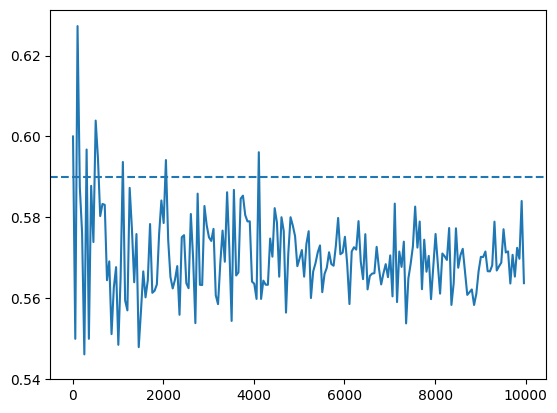

In [53]:
# let's plot out the values and see how they behave
import seaborn as sns
import matplotlib.pyplot as plt

x_ = np.arange(10,10000,50)
plot = sns.lineplot(x=x_,y=np.array(simulated))
plot.set_ylim(bottom=0.54)
plt.axhline(y = 0.59, linestyle='--')

The chart shows that as the sample size increase the values converge towards something around 0.57. Which is not very accurate. One of the reasons for this could be less sample size or some error in the resampling strategy.

## Problem 2
### Approximating the value of $\pi$

The target is to estimate the value of $\pi$ through simulation.

The strategy for this is as follows:
We know that the expression for the area of a circle is given as $\pi*r^2$, where r is the raidus.
Now consider a square paper with side length 2, so that a circle with radius one can be fitted exactly in the square. Consider the area proportion of the circle to the square, i.e. $\frac{\pi*1^2}{2^2}$ = $\frac{\pi}{4}$

Now for our simulation strategy, we can sample a collection of points $(x_i,y_i)$, $i=1(1)n$ where each $0\le x_i,y_i \le 1$, i.e. all in the first quadrant.
Following that if we get the proportion of points for which the square of their sum is less than equal to 1, we can equate that with the value $\frac{\pi}{4}$ since that gives us a geometric probability of choosing a point within the circle, which is also an approximation of the proportion of area between the circle and the square.


In [24]:
n=100 #sample size
samples = np.random.uniform(-2,2,(n,2)) # creating a set of 100 coordinate samples

In [26]:
import pandas as pd

samples_df = pd.DataFrame(samples, columns=['x','y']) # creating a dataframe out of the samples

In [28]:
samples_df.head()

,x,y
0,-0.074737,-1.534134
1,1.406717,-1.720619
2,-0.708738,-1.117959
3,-0.092314,-0.906098
4,-1.941896,1.406300


In [29]:
samples_df['squared_sum'] = np.square(samples_df['x'])+np.square(samples_df['y']) # calculating squared sum
samples_df['flag'] = samples_df['squared_sum'].apply(lambda x: 1 if x<=1 else 0) # applying a flag for coordinates that fall inside the circle

In [30]:
samples_df.head()

,x,y,squared_sum,flag
0,-0.074737,-1.534134,2.359153,0
1,1.406717,-1.720619,4.939382,0
2,-0.708738,-1.117959,1.752142,0
3,-0.092314,-0.906098,0.829535,1
4,-1.941896,1.406300,5.748638,0


In [33]:
# calculating final percentage
samples_df.flag.value_counts()[1]/samples_df.flag.value_counts().sum() 

0.17

In [44]:
# Let's perform the exercise again with higher sample size
n=100000 #sample size
samples = np.random.uniform(0,1,(n,2)) # creating a set of 100 coordinate samples
samples_df = pd.DataFrame(samples, columns=['x','y']) # creating a dataframe out of the samples
samples_df['squared_sum'] = np.square(samples_df['x'])+np.square(samples_df['y']) # calculating squared sum
samples_df['flag'] = samples_df['squared_sum'].apply(lambda x: 1 if x<=1 else 0) # applying a flag for coordinates that fall inside the circle
# calculating final percentage
final_prop = samples_df.flag.value_counts()[1]/n
print("The proportion of points which fall inside the circle is: ",final_prop)
print("Then estimate of pi obtained from this proportion is: ", final_prop*4)

The proportion of points which fall inside the circle is:  0.78646
Then estimate of pi obtained from this proportion is:  3.14584


Similar to the previous exercise we can also simulate the value for different sample size and see how the value converges with increasing sample size

In [45]:
simulation_set = np.arange(100,100000,100)
pi_estimates = []
for n in simulation_set:
    samples = np.random.uniform(0,1,(n,2)) # creating a set of 100 coordinate samples
    samples_df = pd.DataFrame(samples, columns=['x','y']) # creating a dataframe out of the samples
    samples_df['squared_sum'] = np.square(samples_df['x'])+np.square(samples_df['y']) # calculating squared sum
    samples_df['flag'] = samples_df['squared_sum'].apply(lambda x: 1 if x<=1 else 0) # applying a flag for coordinates that fall inside the circle
    # calculating final percentage
    final_prop = samples_df.flag.value_counts()[1]/n
    pi_estimates.append(final_prop*4)
    # print("The proportion of points which fall inside the circle is: ",final_prop)
    # print("Then estimate of pi obtained from this proportion is: ", final_prop*4)


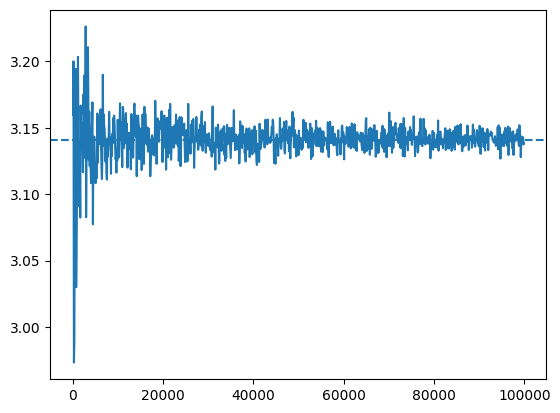

In [51]:
import matplotlib.pyplot as plt
plot = sns.lineplot(x=simulation_set,y=np.array(pi_estimates))
plt.axhline(y=3.141,linestyle='--')